In [42]:
# Importing necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Loading the data
desc_genres_df = pd.read_csv('../data/desc_genres_data.csv')
with open('../data/genres_map_clean.json', 'r') as f:
    genres_map = json.load(f)


In [44]:
# Convert the genre mapping from dictionary to DataFrame for easy merging
genre_mapping_df = pd.DataFrame([(k, v['id']) for k, v in genres_map.items()], columns=['genre', 'id'])

In [45]:
# Updated function to map genre IDs to genre names with error handling
def map_genres(genre_ids, mapping_df):
    if isinstance(genre_ids, str):  # Check if genre_ids is a string
        genre_ids = genre_ids.split(", ")
        genre_names = mapping_df[mapping_df['id'].isin(map(int, genre_ids))]['genre'].tolist()
        return ", ".join(genre_names)
    else:
        return ""

In [46]:
# Apply the mapping function to the genres column
desc_genres_df['genre_names'] = desc_genres_df['genres'].apply(map_genres, mapping_df=genre_mapping_df)

In [47]:
# Display the first few rows of the dataframe to check the mappings
print("First few rows of the dataset:")
print(desc_genres_df.head())

First few rows of the dataset:
                                         description  \
0  Sirens and Succubi and Cops…oh my.\n\nA Tinder...   
1  Every man has a limit. Jack is about to reach ...   
2  River James knew he was in trouble. Without wa...   
3  From New York Times bestselling author, David ...   
4  A secret room beneath the Sunrise Cove Inn unl...   

                                 genres  \
0  84, 14, 86, 121, 33, 186, 1, 89, 119   
1                    84, 1, 85, 22, 146   
2              84, 28, 1, 8, 33, 86, 89   
3                             84, 1, 85   
4                         84, 1, 88, 29   

                                         genre_names  
0  Adventure, Fantasy, Thriller & suspense, Ficti...  
1            Adventure, LGBTQ+, Fiction, Action, Gay  
2  Adventure, Christian, Religious, Thriller & su...  
3                         Adventure, Fiction, Action  
4        Adventure, Romance, Fiction, Sea adventures  


In [48]:
# Basic data exploration
print("\nBasic Statistics:")
print(desc_genres_df.describe())

print("\nData Information:")
print(desc_genres_df.info())


Basic Statistics:
                                              description   genres  \
count                                                5538     5758   
unique                                               5528     4188   
top     Being ridiculed, belittled and embarrassed whi...  82, 547   
freq                                                    3       12   

                        genre_names  
count                          5761  
unique                         3950  
top     Poetry, Contemporary Poetry  
freq                             12  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  5538 non-null   object
 1   genres       5758 non-null   object
 2   genre_names  5761 non-null   object
dtypes: object(3)
memory usage: 135.1+ KB
None


In [49]:
# Create a dictionary to store the count of descriptions for each genre
genre_count = {}

# Function to update the genre count dictionary
def count_genres(genre_ids, mapping_df, genre_count):
    if isinstance(genre_ids, str):
        genre_ids = genre_ids.split(", ")
        for genre_id in genre_ids:
            genre_name = mapping_df[mapping_df['id'] == int(genre_id)]['genre'].values[0]
            if genre_name in genre_count:
                genre_count[genre_name] += 1
            else:
                genre_count[genre_name] = 1

# Apply the counting function to each row in the dataframe
desc_genres_df['genres'].apply(count_genres, mapping_df=genre_mapping_df, genre_count=genre_count)

# Sort the genre_count dictionary by the count in ascending order
sorted_genre_count = dict(sorted(genre_count.items(), key=lambda item: item[1]))

# Print the number of descriptions for each genre in ascending order
print("Number of descriptions for each genre (ascending order):")
for genre, count in sorted_genre_count.items():
    print(f"{genre}: {count}")

Number of descriptions for each genre (ascending order):
Bengali: 1
Annotations & Citations: 2
Biographical / Canada: 3
Biographical / Other: 3
Autographs: 3
Buttons & pins: 3
Culinary arts: 3
Facilities Management: 3
Calculators: 3
American / Northwestern States: 3
Decks & patios: 3
Baltic Languages: 3
Cantonese: 3
Air & Space: 3
Antitrust: 3
Ballet: 3
Big Band & Swing: 3
Ballooning: 3
Locations: 3
Alternative Dispute Resolution: 4
Apparel, costumes, & textiles: 4
American / California Style: 4
American / Middle Atlantic States: 4
American / Middle Western States: 4
Catalogs: 4
Antiques & collectibles: 4
Apartment living: 4
Ancient Languages: 4
Agricultural: 4
Bluegrass: 4
Bedtime stories: 4
City planning: 4
Honeymoon planning: 4
Animation: 4
Construction: 5
American / Hispanic American: 5
Biographical / European: 5
Caribbean & West Indies / Cuba: 5
Alternative: 5
Bahá’í: 5
Anthropology / Physical: 5
Identity theft: 5
Groom preparation: 5
Computer Science: 6
Design: 6
Choral: 6
Bride 

In [50]:
# Convert the genre_count dictionary to a pandas DataFrame for easier plotting
genre_count_df = pd.DataFrame(list(sorted_genre_count.items()), columns=['Genre', 'Count'])

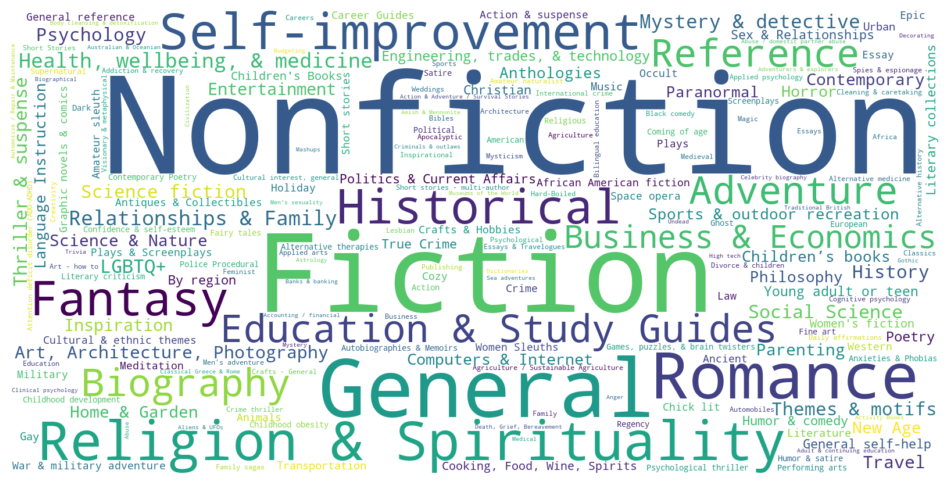

In [51]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(genre_count)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()